<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/EqContraste_LCDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp

In [23]:
# constantes
H0 = 67.4
O_m0 = 0.315

In [24]:
# Modelo LCDM:
def Densidade(t, y):    # t é o fator de escala e y é o delta (contraste)
    D_RG  = y[0]     # contraste
    dD_RG = y[1]    # primeira derivada do contraste

    O_m = O_m0*t**(-3)
    O_L = 1 - O_m0

    H_RG = H0*np.sqrt(O_m + O_L)    # H(z)
    dH_RG = - (H_RG/t) - 0.5*(H0/t)*(H0/H_RG)*(O_m - 2*O_L)        # derivada do H(z)

# funções definidas somente para facilitar a escrita da derivada segunda do contraste
    faux1 = 3*H0**2
    faux2 = 2*(t**2)*(H_RG**2)

    ddD_RG = - ((3/t) + (dH_RG/H_RG))*dD_RG + (faux1/faux2)*O_m*D_RG   #  eq. da derivada segunda do contraste
    return [dD_RG, ddD_RG]

In [25]:
# Espaço de integração:
t_span = [0.17, 1]   # intervalo de integração do fator de escala
t = np.linspace(0.17, 1, 1000)

# Condições iniciais:
y0 = [0.17, 1] # fator de escala inicial e final

In [26]:
# Solução:
sol = solve_ivp(Densidade, t_span, y0, t_eval=t, method='LSODA') # função que quero resolver, o intervalo de integração, as condições iniciais, o linspace e o método
D_RG = sol.y[0]
dD_RG = sol.y[1]


# definindo o redshift
z = 1/sol.t - 1

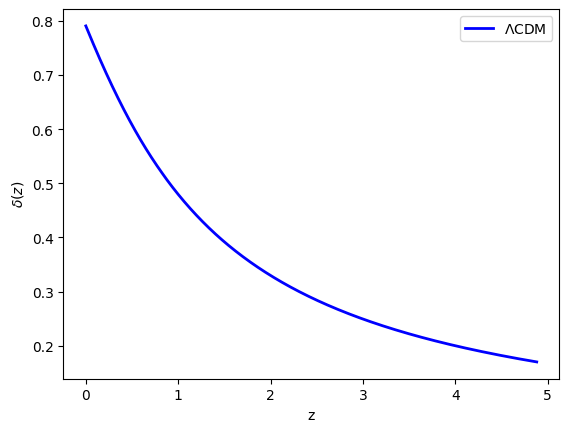

In [27]:
# plotando o contraste x z
plt.plot(z, D_RG, color='blue', linewidth = 2, label='$\Lambda$CDM')
plt.legend()
plt.xlabel('z')
plt.ylabel('$\delta(z)$')
#plt.savefig('delta(z).png', dpi=520, format='png', bbox_inches='tight')
plt.show()

In [28]:
# propação do erro
O_m = O_m0*t**(-3)
O_L = 1 - O_m0

eO_m0 = sol.t**(-3) * 0.007  # 0.007 é o erro de Om0 segundo o Planck 2018

H_RG = H0*np.sqrt(O_m + O_L)    # H(z)
eH = ( H0*(sol.t**(-3)) / ( 2*np.sqrt(O_m0*(sol.t**(-3)) + 1 - O_m0 ) ) ) * eO_m0

dH_RG = - (H_RG/t) - 0.5*(H0/t)*(H0/H_RG)*(O_m - 2*O_L)

faux1 = 3*H0**2
faux2 = 2*(t**2)*(H_RG**2)

D_RG_mc = []
for i in range(1000):

    Hi = np.random.normal(H_RG, eH)
    Oi = np.random.normal(O_m, eO_m0)

    D_RG_mc.append(- ((3/t) + (dH_RG/H_RG))*dD_RG + (faux1/faux2)*O_m*D_RG)  # o que botar aqui???

D_RG_mc = np.array(D_RG_mc)


sigma_D_RG = []
for i in range(len(z)):

    Di = D_RG_mc[:, i]
    sigma_D_RG.append(np.std(Di))

sigma_D_RG = np.array(sigma_D_RG)

ValueError: 'y1' is not 1-dimensional

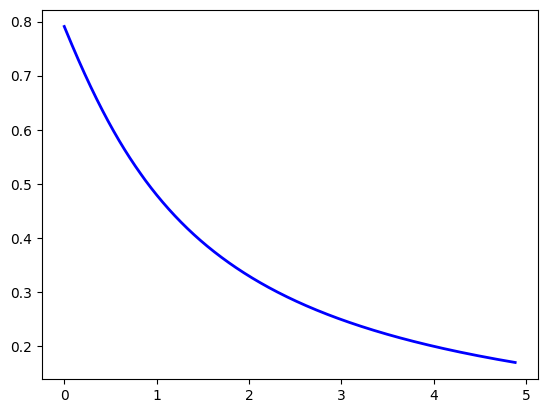

In [29]:
# plotando o contraste x z
plt.plot(z, D_RG, color='blue', linewidth = 2, label='$\Lambda$CDM')

plt.fill_between(z, D_RG_mc - sigma_D_RG, D_RG_mc + sigma_D_RG, alpha=0.4, fc='blue')
plt.fill_between(z, D_RG_mc - 1.96*sigma_D_RG, D_RG_mc + 1.96*sigma_D_RG, alpha=0.2, fc='blue')


plt.legend()
plt.xlabel('z')
plt.ylabel('$\delta(z)$')
#plt.savefig('delta(z).png', dpi=520, format='png', bbox_inches='tight')
plt.show()